## Classificador de Spam - Naive Bayes

## Importa todos os pacotes de Processamento de Linguagem Natural

In [1]:
#import nltk
#nltk.download('all')
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

## Ler arquivo de dados  - SMS de celular

In [2]:
!ls *.csv

Youtube 01-comments-Psy.csv     spam.csv
Youtube 09-comments Shakira.csv


In [3]:
!head spam.csv

In [4]:
# Dados coletados e Classificados de SMS de celular
dataset = pd.read_csv('spam.csv', encoding='latin-1')
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
# número de tuplas
print("Número de linhas: ",len(dataset))

Número de linhas:  5572


In [6]:
# número de atributos
print("Número de atributos: ",len(dataset.columns))

Número de atributos:  5


In [7]:
# atributos
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
# dataset
dataset.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


## Limpando o dataset

In [9]:
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

dataset2 = dataset.loc[:, ['v1', 'v2']]
dataset2.columns = ['classe', 'texto']
dataset2.head(10)

,classe,texto
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030


In [10]:
dataset2.classe.value_counts()

ham     4825
spam     747
Name: classe, dtype: int64

In [11]:
ham = dataset2.classe.value_counts()[0]
spam = dataset2.classe.value_counts()[1]
ham, spam

(4825, 747)

In [12]:
print('ham =', round(ham/ (ham+spam) * 100), '%')
print('spam =', round(spam/ (ham+spam) * 100), '%')

ham = 87.0 %
spam = 13.0 %


In [13]:
dataset2.tail()

,classe,texto
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free
5571,ham,Rofl. Its true to its name


## Pre-Processamento 

### Separando SMS e suas classes

In [14]:
texto = dataset2['texto'].values
classes = dataset2['classe'].values

In [15]:
print(texto[10:])

["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'
 'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


In [16]:
print(classes[:10])

['ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'ham' 'ham' 'spam' 'spam']


In [17]:
print(texto[classes == 'ham'][:10])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 'U dun say so early hor... U c already then say...'
 "Nah I don't think he goes to usf, he lives around here though"
 'Even my brother is not like to speak with me. They treat me like aids patent.'
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"
 "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."
 'I HAVE A DATE ON SUNDAY WITH WILL!!' "Oh k...i'm watching here:)"]


In [18]:
print(texto[classes == 'spam'][:10])

["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"
 'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'
 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'
 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'
 'URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'
 'XXXMobileMovieClub: To use your credit, click the WAP link in the n

# Gerando o modelo

In [19]:
vectorizer = CountVectorizer(analyzer="word")
freq_texto = vectorizer.fit_transform(texto)
freq_texto.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
(freq_texto.toarray()).shape

(5572, 8672)

## aplicando o Naive Bayes

In [21]:
modelo = MultinomialNB()
modelo.fit(freq_texto,classes)

MultinomialNB()

### Testando o modelo com algumas instâncias simples

In [22]:
testes = ["Yes i have. So that's why u texted. Pshew...missing you so much",
          'Free entry Katty Perry Show, click here...',
          'Winner!!! are you wish to win a lottery',
          'Have a safe trip to  Russia! enjoy...',
          'Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min',
          'Temporal Convolutional Nets Take Over from RNNs for NLP Predictions',
          'U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute'
         ]

In [23]:
freq_testes = vectorizer.transform(testes)

In [24]:
freq_testes.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array(['ham', 'spam', 'spam', 'ham', 'spam', 'ham', 'spam'], dtype='<U4')

In [26]:
tweets = testes
classificacao = modelo.predict(freq_testes)

print ("Novas Instancias Classificadas...")
for i in range(len(testes)):
    print (classificacao[i], " -> ", tweets[i] )

Novas Instancias Classificadas...
ham  ->  Yes i have. So that's why u texted. Pshew...missing you so much
spam  ->  Free entry Katty Perry Show, click here...
spam  ->  Winner!!! are you wish to win a lottery
ham  ->  Have a safe trip to  Russia! enjoy...
spam  ->  Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
ham  ->  Temporal Convolutional Nets Take Over from RNNs for NLP Predictions
spam  ->  U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute


## Avaliando o modelo 

In [27]:
# Fazendo o cross validation do modelo
import numpy as np
resultados = cross_val_predict(modelo, freq_texto, classes, cv=10)

In [28]:
resultados[:10]

array(['ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam',
       'spam'], dtype='<U4')

In [29]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.9813352476669059

In [30]:
freq_texto.count_nonzero()

73916

### Matriz de Confusão

In [31]:
# Matriz de confusão
print (pd.crosstab(classes, resultados, rownames=['REAL'], colnames=['PREDITO'], margins=True))

PREDITO   ham  spam   All
REAL                     
ham      4760    65  4825
spam       39   708   747
All      4799   773  5572


In [32]:
# Medidas de validação do modelo
classe=['ham','spam']
print (metrics.classification_report(classes,resultados,classe))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      4825
        spam       0.92      0.95      0.93       747

    accuracy                           0.98      5572
   macro avg       0.95      0.97      0.96      5572
weighted avg       0.98      0.98      0.98      5572



/Users/uepb/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=['ham', 'spam'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


# Visualizando os Spam's

In [33]:
text_spam = texto[classes == 'spam']
spam = ""
for i in range(len(text_spam)):
    spam = spam + ' ' + text_spam[i]
spam[:500]

" Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? "

In [34]:
#!pip install wordcloud

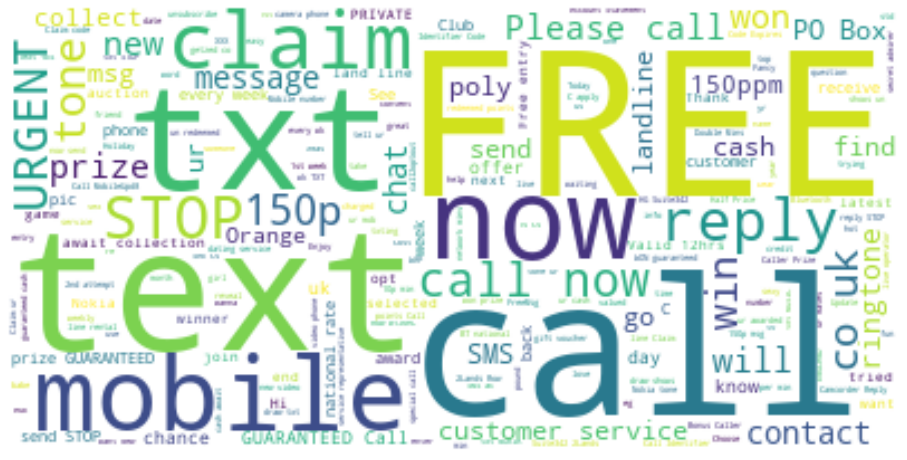

In [35]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
#wc.generate_from_frequencies(spam)
wc.generate_from_text(spam)
# show
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
text_ham = texto[classes == 'ham']
ham = ""
for i in range(len(text_spam)):
    ham = ham + ' ' + text_ham[i]
ham[:500]

" Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don't think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I'm go"

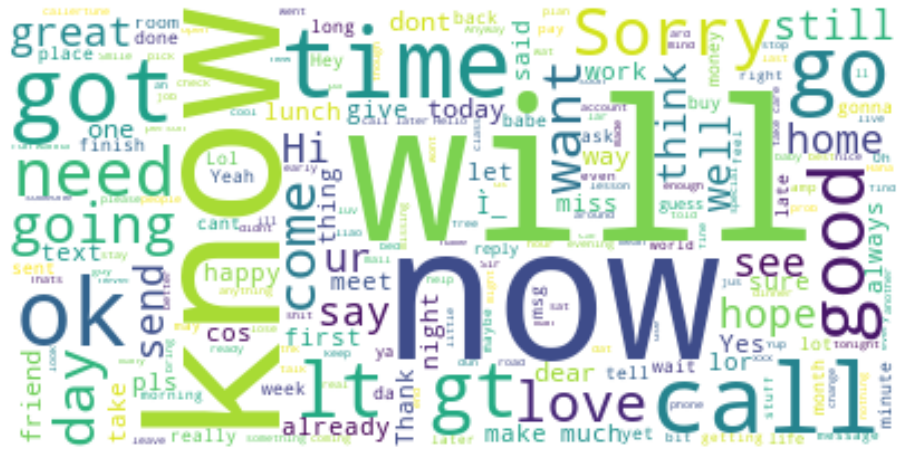

In [37]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
#wc.generate_from_frequencies(spam)
wc.generate_from_text(ham)
# show
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

---